In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from gridworld import standard_grid, negative_grid
from iterative_policy_evaluation_probabilistic import print_values, print_policy
from monte_carlo_es import max_dict

In [10]:
GAMMA = 0.9
ALPHA = 0.1
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

In [11]:
def epsilon_greedy(Q, s, eps=0.1):
  if np.random.random() < eps:
    return np.random.choice(ALL_POSSIBLE_ACTIONS)
  else:
    a_opt = max_dict(Q[s])[0]
    return a_opt

In [12]:
# grid = standard_grid()
grid = negative_grid(step_cost=-0.1)

# print rewards
print("rewards:")
print_values(grid.rewards, grid)

rewards:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|


In [13]:
# initialize Q(s,a)
Q = {}
states = grid.all_states()
for s in states:
    Q[s] = {}
    for a in ALL_POSSIBLE_ACTIONS:
        Q[s][a] = 0

In [14]:
# let's also keep track of how many times Q[s] has been updated
update_counts = {}

In [15]:
# repeat until convergence
reward_per_episode = []
for it in range(10000):
    if it % 2000 == 0:
        print("it:", it)

    # begin a new episode
    s = grid.reset()
    a = epsilon_greedy(Q, s, eps=0.1)
    episode_reward = 0
    while not grid.game_over():
        # perform action and get next state + reward
        r = grid.move(a)
        s2 = grid.current_state()

        # update reward
        episode_reward += r

        # get next action
        a2 = epsilon_greedy(Q, s2, eps=0.1)

        # update Q(s,a)
        Q[s][a] = Q[s][a] + ALPHA*(r + GAMMA*Q[s2][a2] - Q[s][a])

        # we would like to know how often Q(s) has been updated too
        update_counts[s] = update_counts.get(s,0) + 1

        # next state becomes current state
        s = s2
        a = a2

    # log the reward for this episode
    reward_per_episode.append(episode_reward)


it: 0
it: 2000
it: 4000
it: 6000
it: 8000


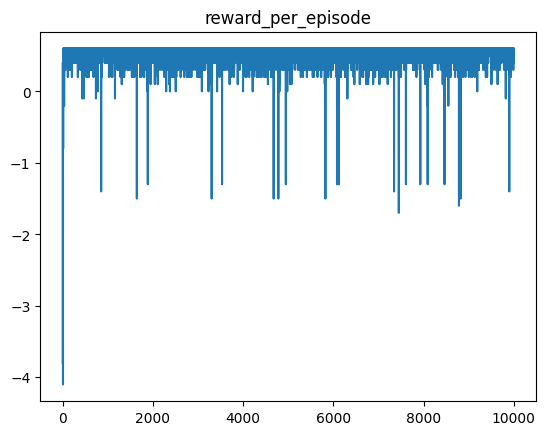

In [16]:
plt.plot(reward_per_episode)
plt.title("reward_per_episode")
plt.show()

In [17]:
# determine the policy from Q*
# find V* from Q*
policy = {}
V = {}
for s in grid.actions.keys():
    a, max_q = max_dict(Q[s])
    policy[s] = a
    V[s] = max_q

In [18]:
# what's the proportion of time we spend updating each part of Q?
print("update counts:")
total = np.sum(list(update_counts.values()))
for k, v in update_counts.items():
    update_counts[k] = float(v) / total
print_values(update_counts, grid)

update counts:
---------------------------
 0.20| 0.19| 0.19| 0.00|
---------------------------
 0.20| 0.00| 0.01| 0.00|
---------------------------
 0.20| 0.01| 0.01| 0.00|


In [19]:
print("values:")
print_values(V, grid)
print("policy:")
print_policy(policy, grid)

values:
---------------------------
 0.58| 0.76| 1.00| 0.00|
---------------------------
 0.41| 0.00| 0.80| 0.00|
---------------------------
 0.25| 0.40| 0.45| 0.11|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |
